In [1]:
%matplotlib inline
import sys
from simulation_toykit_sources import *

sys.path.append('../virtuallab/tools')
from common import *

def get_ipynb_dir():
    return "../virtuallab/pynb/sources/gaussian_wave/"

notebook_dir = get_ipynb_dir()
degree       = np.pi/180
wavelength   = 0.5
k      = 2 * np.pi/wavelength
start  = [-5, -5] # 'um'
end    = [5, 5]
shape  = [1000, 1000]

step   = [(b-a)/N for a,b,N in zip(start, end, shape)]
meta   = {
    "dx" : step[0] * 1e-3, # set display unit to 'mm'
    "dy" : step[1] * 1e-3,
    "nx" : shape[0],
    "ny" : shape[1]
}

display_pos = [[0,0], [0,1], [1, 0], [1, 1]]
# display_pos = [[0,0], [0,1], [0,2], [0,3]]

[0] → regist_plugin (simulation_toykit_sources:14)
[0] ← regist_plugin (time: 0ms)


In [2]:
test = [
    [1,1,1, 2, 1.7],
    [5,3, 2, 2, 1.7],
    [10,10,2, 2, 0.4]
]
fix_phase_list = [2.8139, -0.7089, 0.1780,0,0,0,0,0,0]
def hermite_gaussian_wave_test(case_index):
    m,n,wx0, wy0, z = test[case_index]
    baseline = f"{notebook_dir}/golden_data/HG/{case_index}.fin"
    baseline_meta, baseline = parse_file(baseline)

    U = hermite_gaussian_wave.generate(m, n, wavelength, z, [wx0, wy0],start, end, shape)
    U = np.array(list(U)).reshape(*shape)
    U /= np.max(np.abs(U))
    HG_M2      = [gaussian_wave.HG_M2(mn) for mn in [m, n]]
    w_z        = np.array([gaussian_wave.wz(z, k, wz0, M2) for wz0, M2 in zip([wx0, wy0], HG_M2)])
    rz         = np.array([gaussian_wave.rz(k, wz0, M2) for wz0, M2 in zip([wx0, wy0], HG_M2)])
    divergence = np.array([gaussian_wave.divergence(k, wz0, M2) for wz0, M2 in zip([wx0, wy0], HG_M2)])
    gouy       = np.array([gaussian_wave.gouy(z, k, wz0, M2) for wz0, M2 in zip([wx0, wy0], HG_M2)])
    curvature  = np.array([gaussian_wave.curvature(z, k, wz0, M2) for wz0, M2 in zip([wx0, wy0], HG_M2)])

    print(f"(m={m},n={n},wx0={wx0}, wy0={wy0}, z={z})\nw_z={w_z} um, rz={rz} um, radius of curvature={1/curvature} um,divergence={divergence/degree} degree, gouy={np.angle(np.exp(1j*gouy))/degree} degree")
    fig = show_complex_plot(U, meta, f"hermite gaussian bean case_{case_index}")
    # fig = show_complex_plot(U, meta, f"hermite gaussian bean case_{case_index}", [[1, 0], [1, 1], [0,0], [0,1]])
    fig = show_complex_plot(baseline, baseline_meta, "baseline", [[1, 0], [1, 1], [0,0], [0,1]])
    # fig = show_complex_plot(baseline, baseline_meta, "baseline")

    a, b = np.diag(baseline), np.array(np.diag(U))
    b *= np.exp(1j * fix_phase_list[case_index])
    plot_cutlines_with_error(np.abs(a), np.abs(b), "golden_amp", "my_amp")
    plot_cutlines_with_error(np.angle(a), np.angle(b), "golden_phase", "my_phase")
    # plot_cutlines_with_error(np.abs(a), np.abs(a), "golden_amp", "golden_amp")
    # plot_cutlines_with_error(np.abs(b), np.abs(b), "my_amp", "my_amp")
    plot_cutlines_with_error(np.angle(a), np.angle(a), "golden_phase", "golden_phase")
    plot_cutlines_with_error(np.angle(b), np.angle(b), "my_phase", "my_phase")



(m=1,n=1,wx0=1, wy0=2, z=1.7)
w_z=[1.28796001 2.04076217] um, rz=[2.0943951  8.37758041] um, radius of curvature=[ 4.28028873 42.98461972] um,divergence=[27.35671958 13.67835979] degree, gouy=[45.41897436 11.60892266] degree


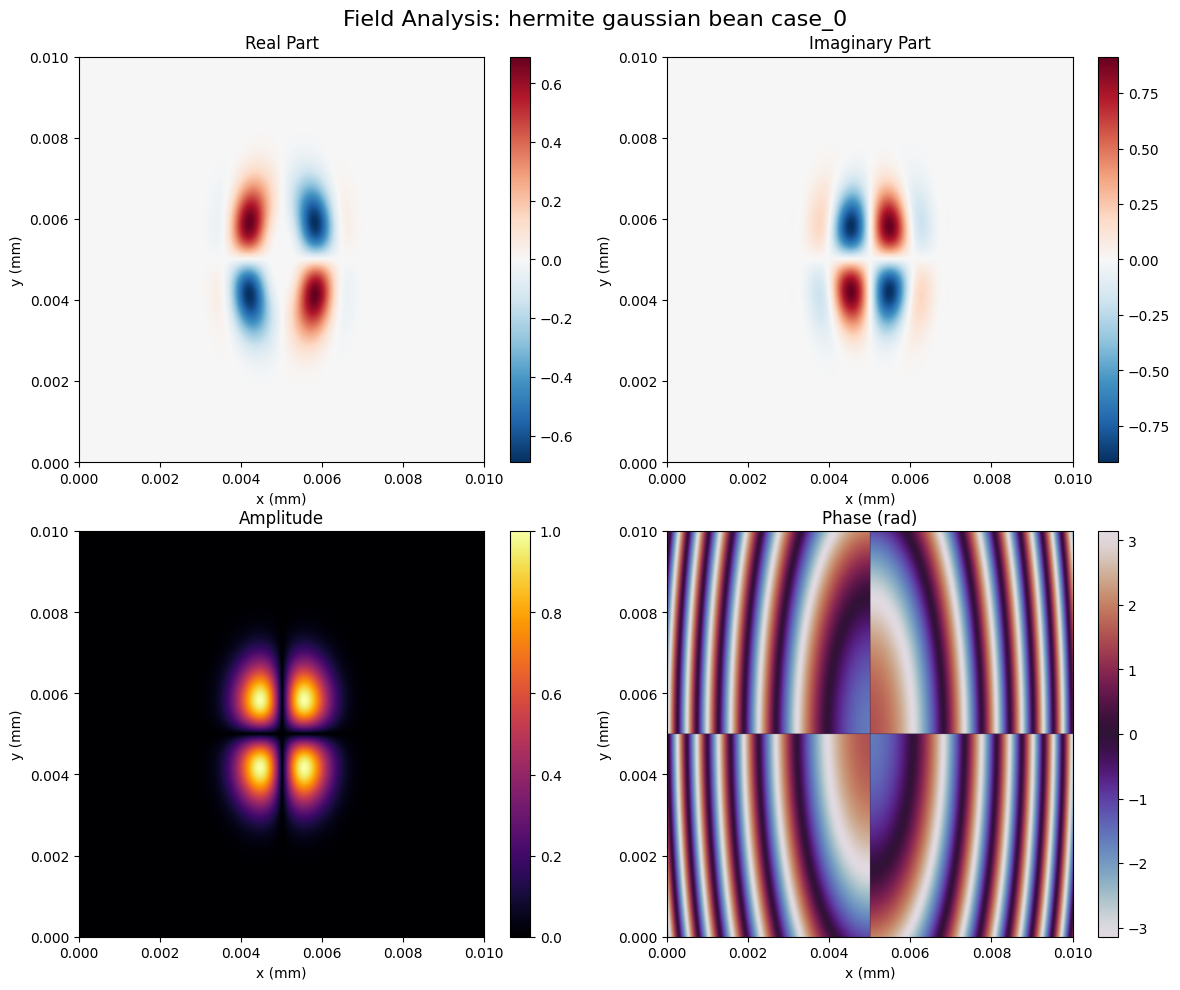

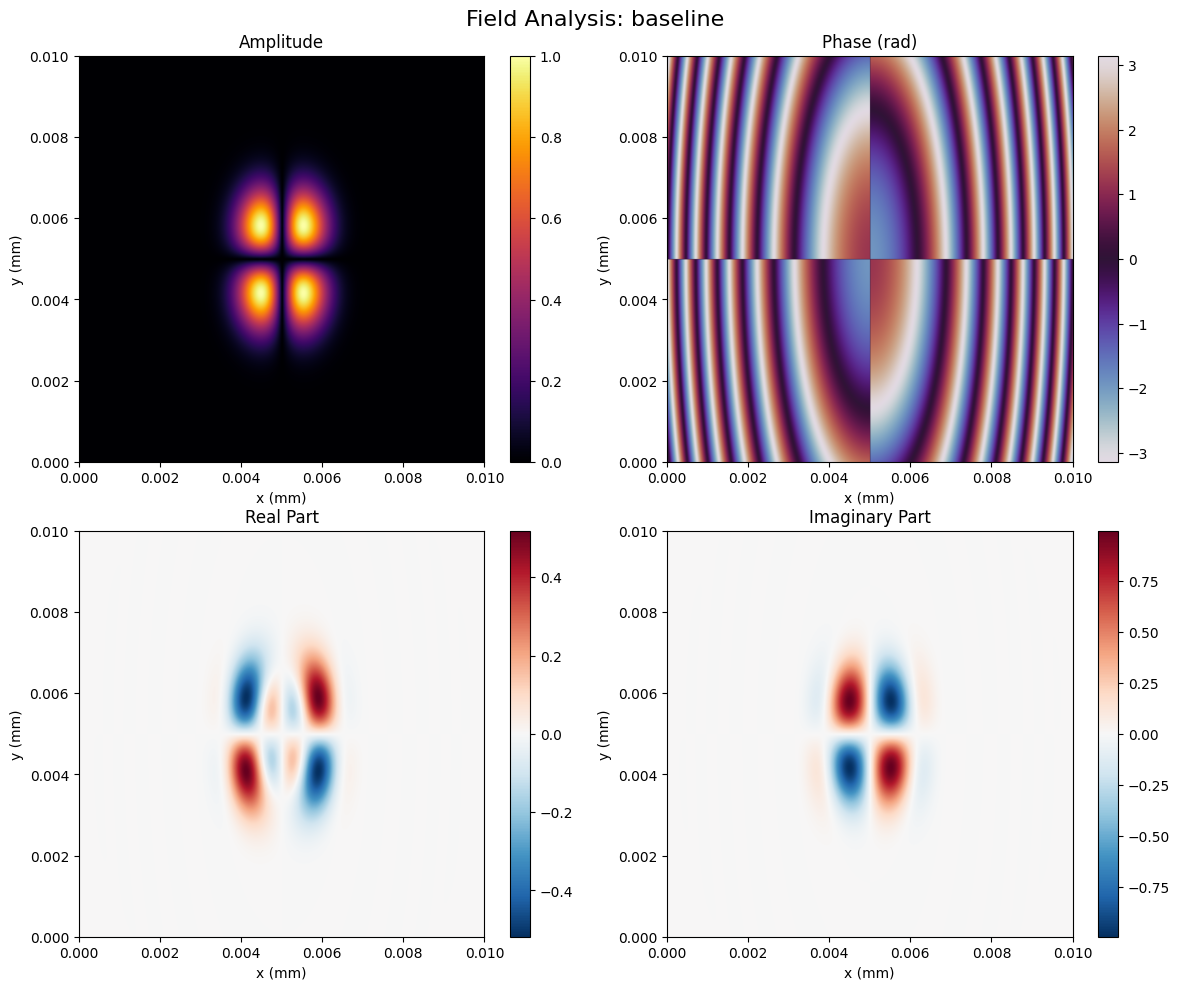

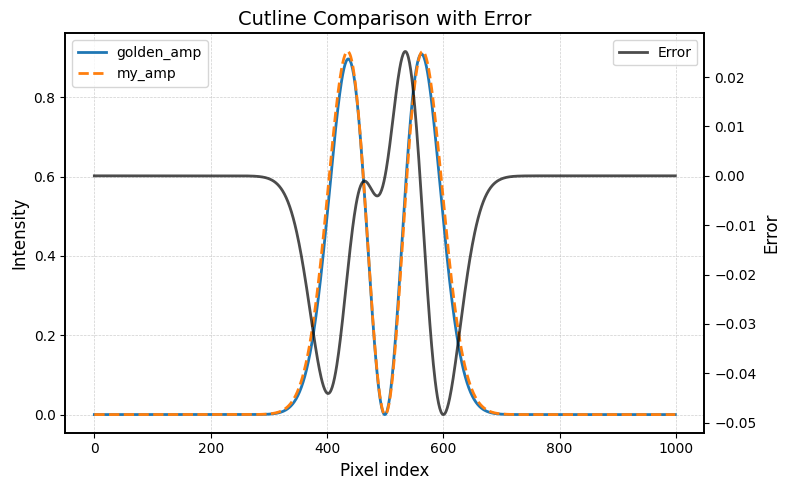

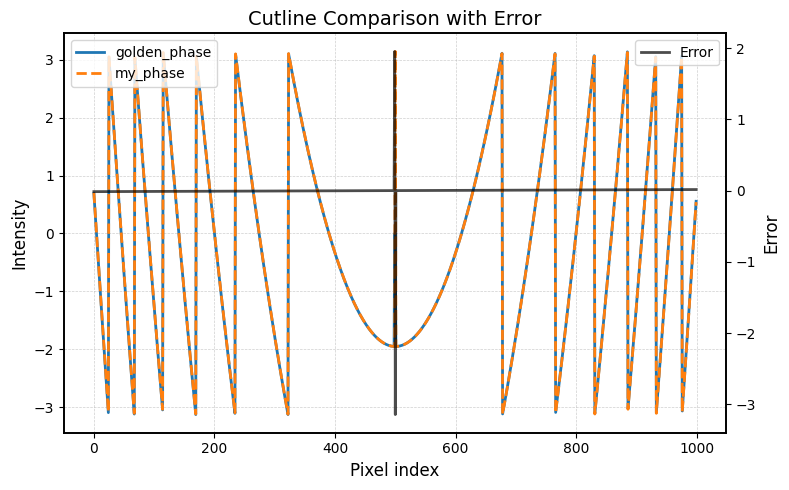

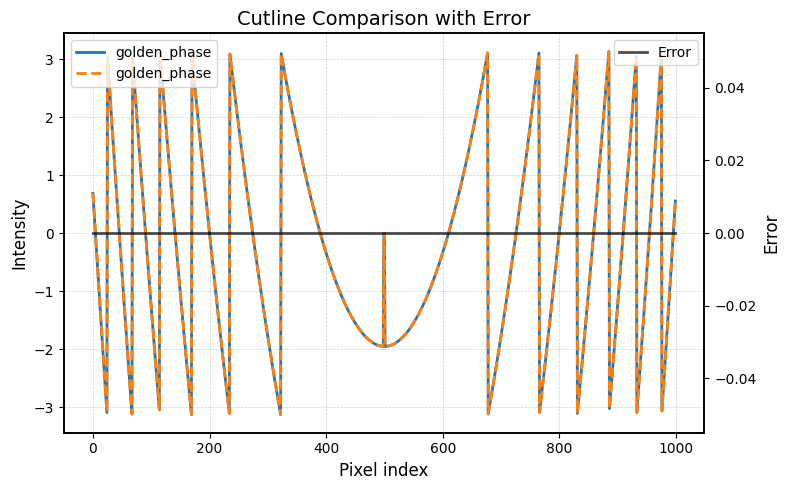

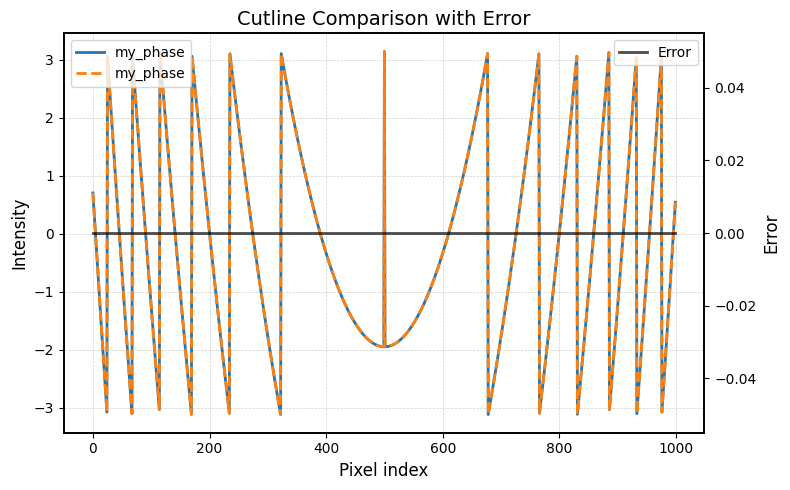

(m=5,n=3,wx0=2, wy0=2, z=1.7)
w_z=[2.49287741 2.21286145] um, rz=[2.28479466 3.5903916 ] um, radius of curvature=[4.77075684 9.28288934] um,divergence=[50.1539859  31.91617285] degree, gouy=[42.56604977 27.08748622] degree


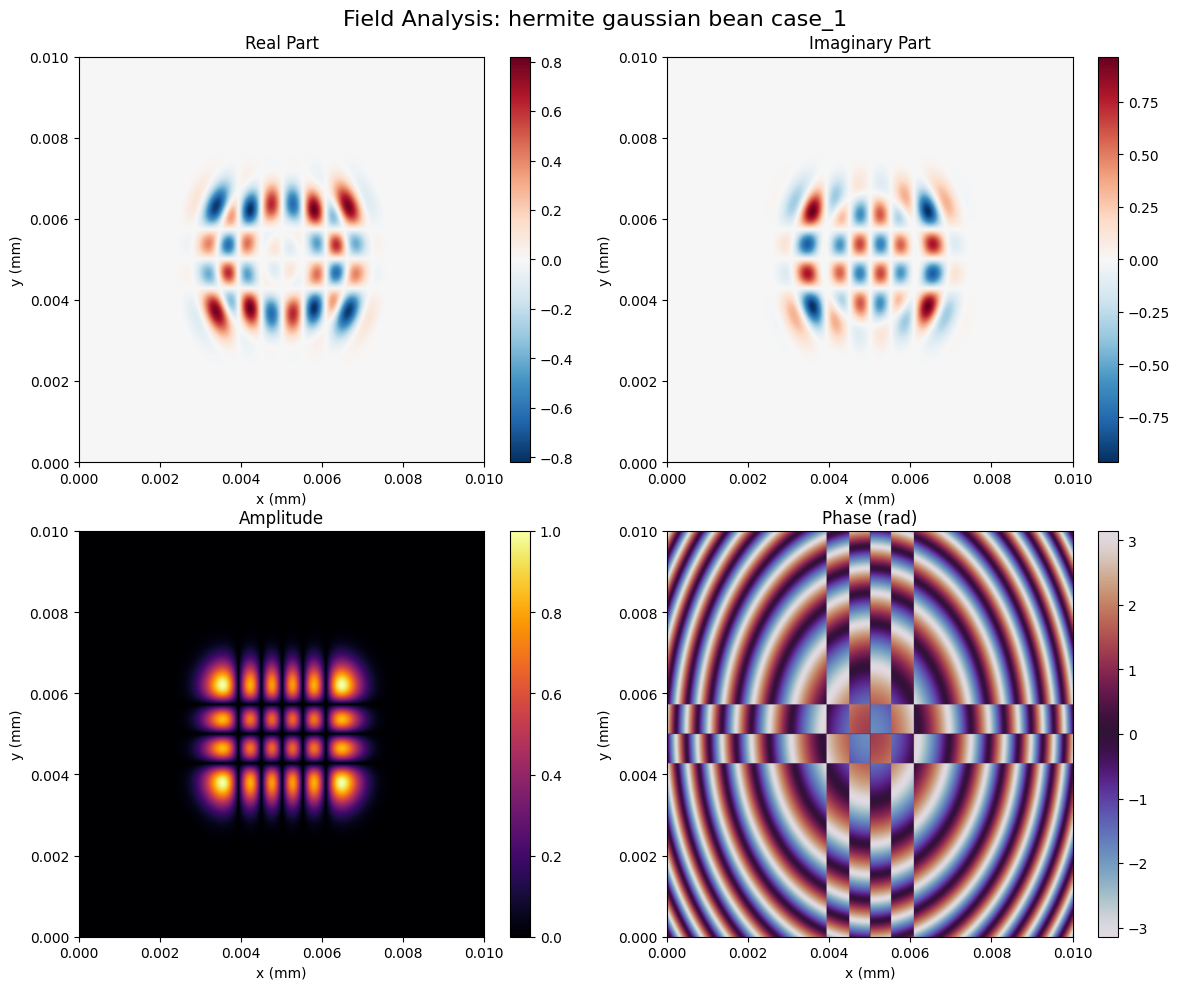

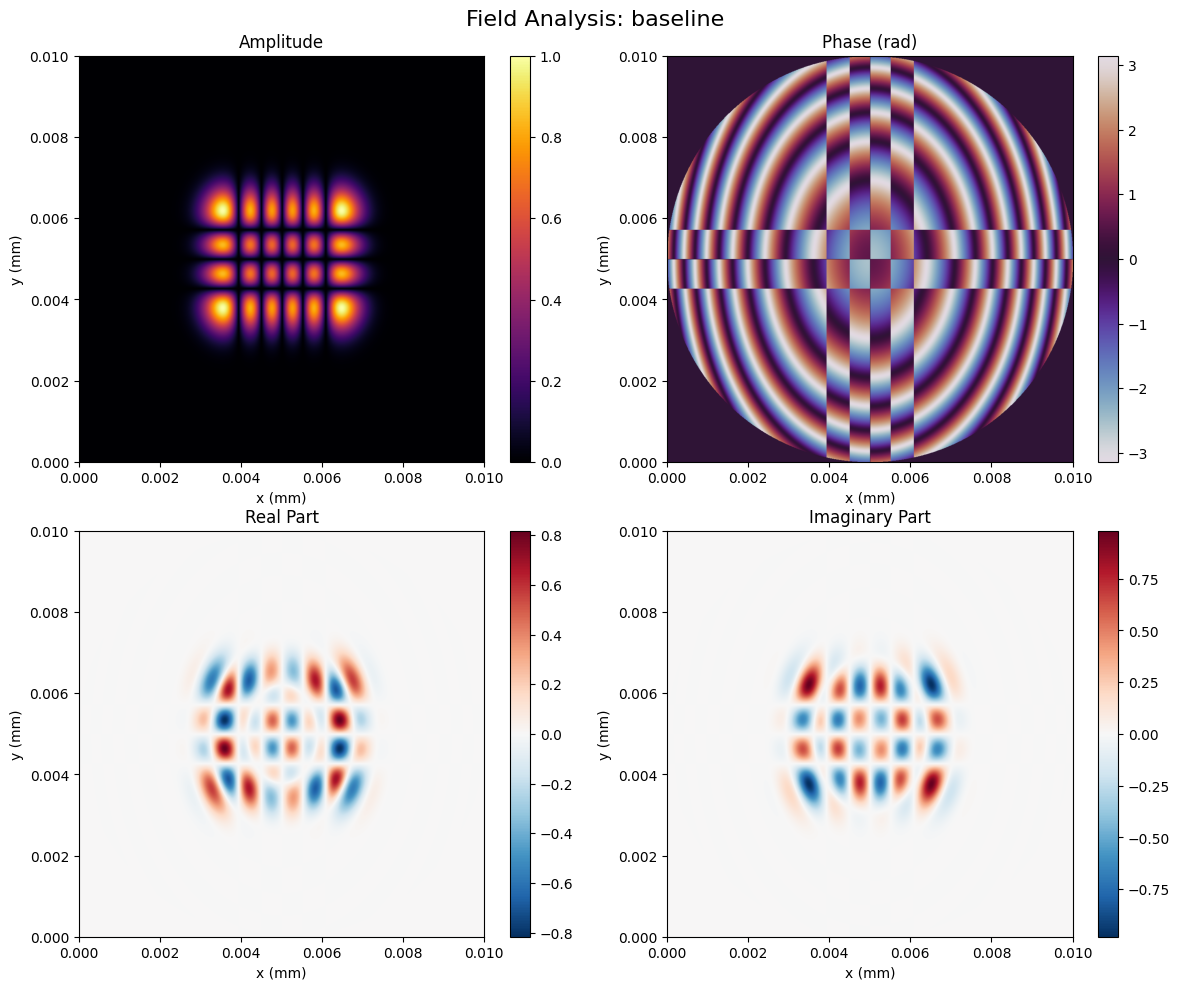

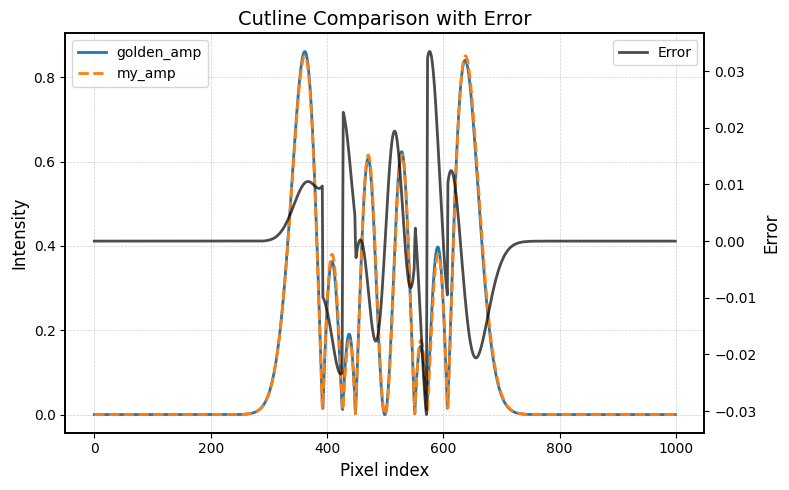

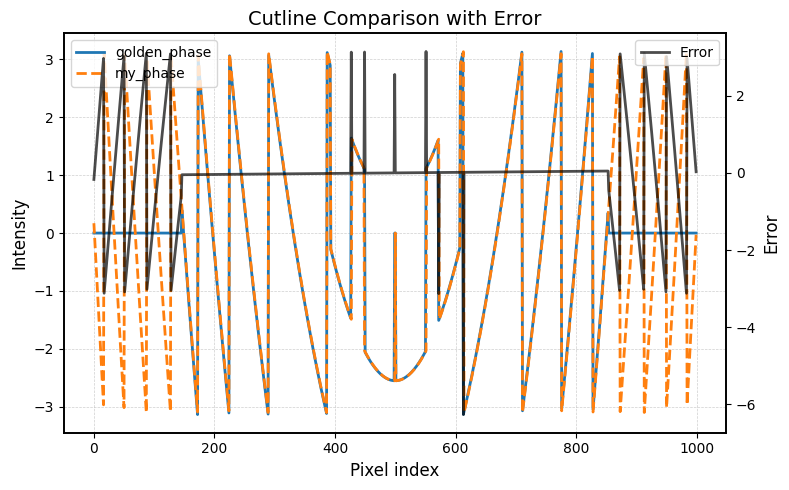

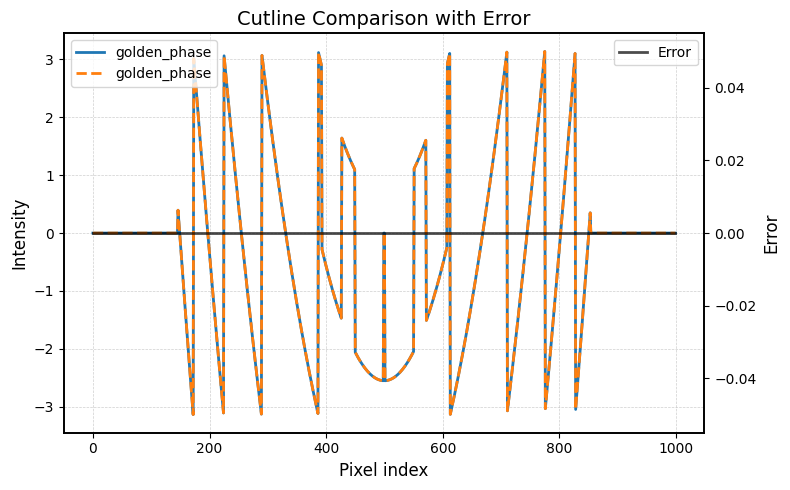

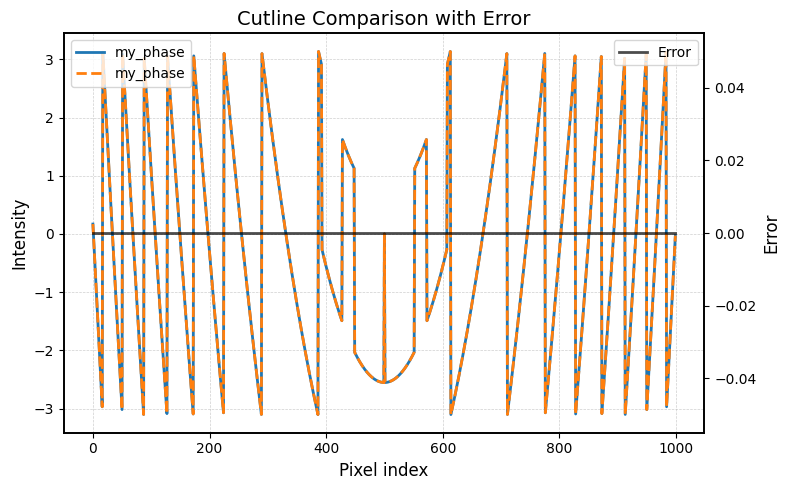

(m=10,n=10,wx0=2, wy0=2, z=0.4)
w_z=[2.10874997 2.10874997] um, rz=[1.1967972 1.1967972] um, radius of curvature=[3.98080885 3.98080885] um,divergence=[95.74851854 95.74851854] degree, gouy=[19.14808706 19.14808706] degree


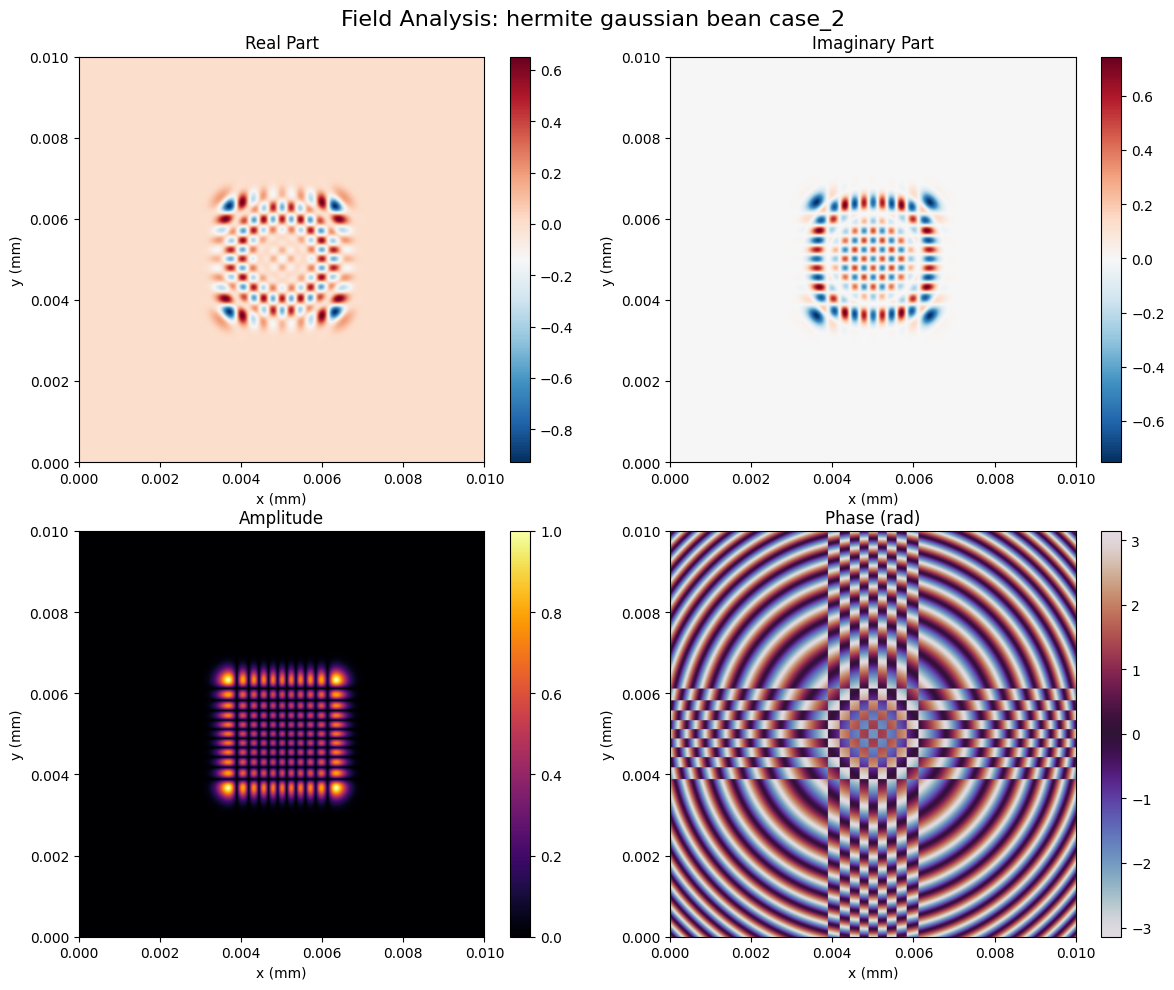

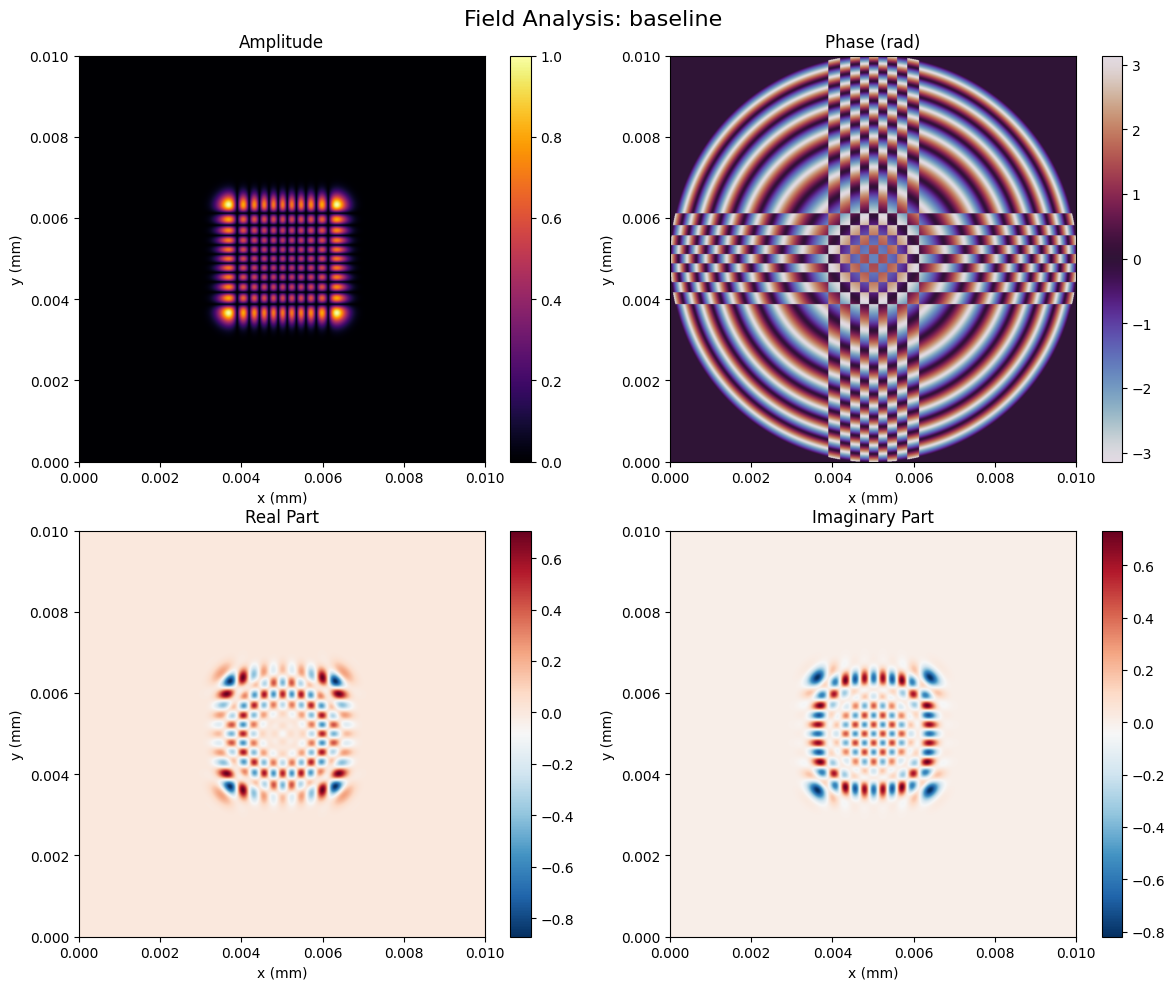

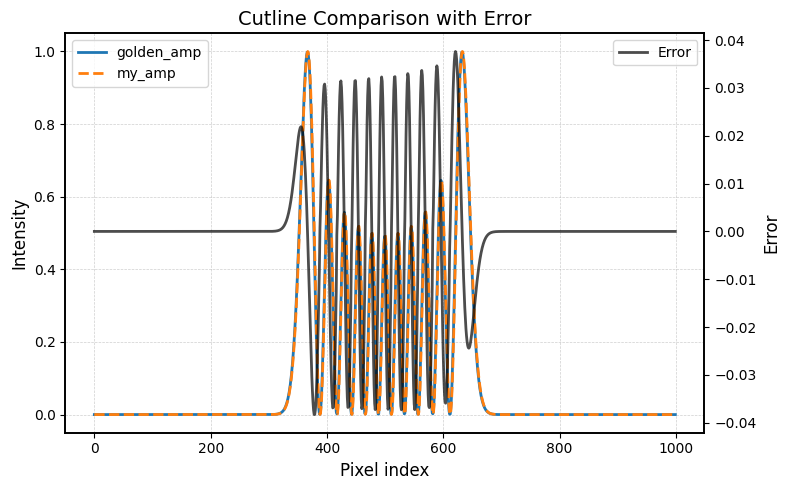

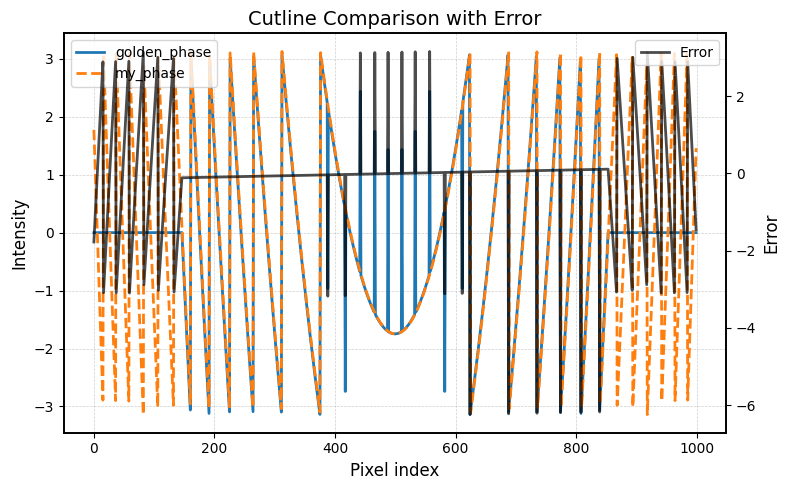

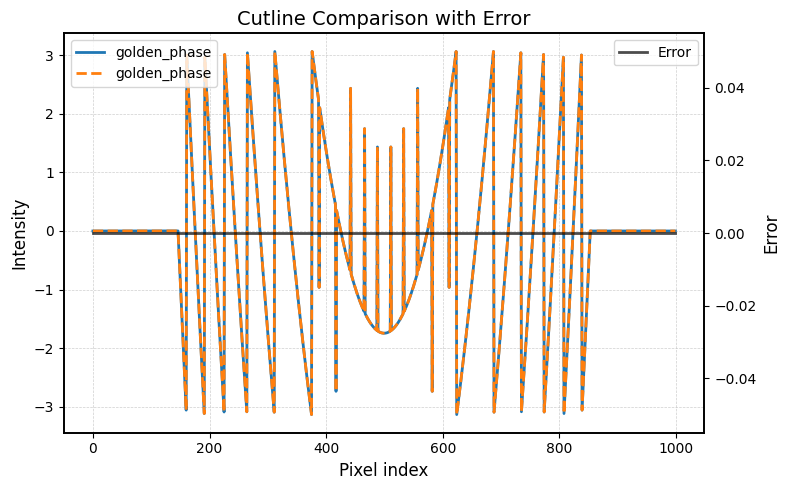

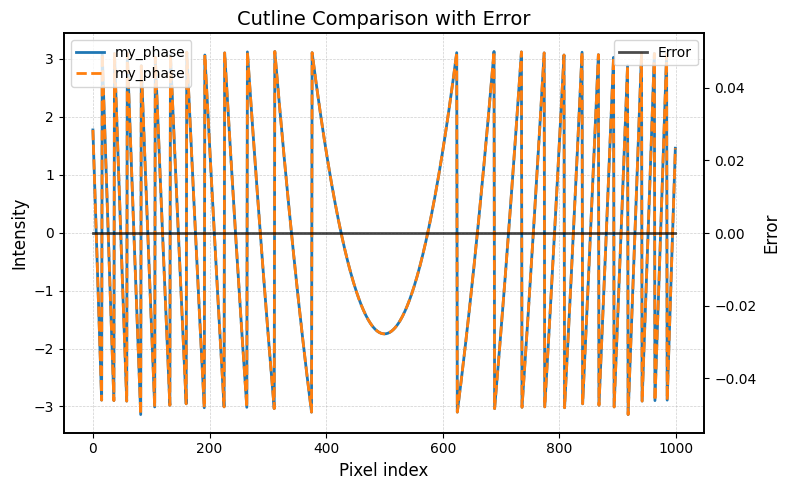

In [3]:
case_index = -1
if -1 == case_index:
    for case_index in range(len(test)):
        hermite_gaussian_wave_test(case_index)
else:
    hermite_gaussian_wave_test(case_index)